In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process


In [2]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 8
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'

In [3]:
df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Getting data from file 'data_set_8.csv' for score 'd8'.

df.head():
      data_date security_id        d8
3967 2010-01-04    10038901   33205.0
545  2010-01-04     1004001   34699.0
2860 2010-01-04     1004601  138000.0
410  2010-01-04     1004801   84610.0
4215 2010-01-04     1006101  630209.0

df.tail():
         data_date security_id         d8
8344816 2017-12-29     9931801   404312.0
8341776 2017-12-29      993201    54850.0
8341709 2017-12-29      995201   697809.0
8344987 2017-12-29     9962801    40077.0
8341576 2017-12-29      996501  1544500.0

getting df shape of (8345449, 3)

No duplicates dtcol-seccol pairs is found.

shape of df (8345449, 3).

data_date      datetime64[ns]
security_id            object
d8                    float64
dtype: object


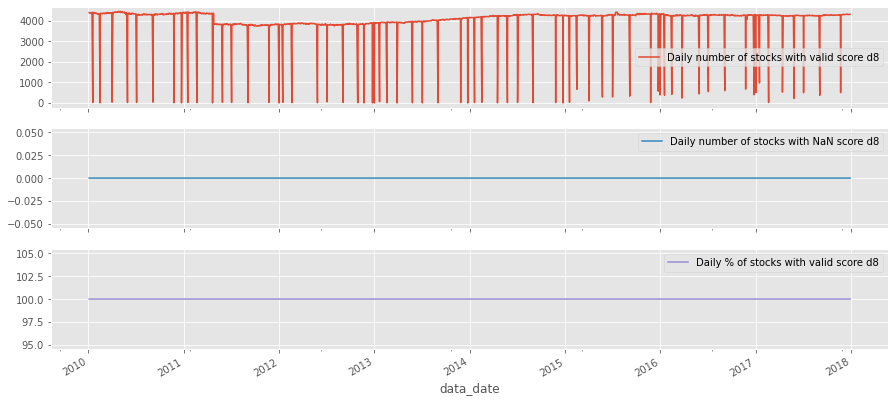

In [4]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

In [6]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

data_date         0
security_id       0
d8             8196
dtype: int64
data_date         0
security_id       0
d8             8196
dtype: int64


 Dropping all NaNs
                 d8
count  8.337253e+06
mean   2.636740e+06
std    8.189243e+08
min   -3.801000e+03
25%    1.937000e+04
50%    1.258330e+05
75%    5.590820e+05
max    2.061810e+12


<AxesSubplot:>

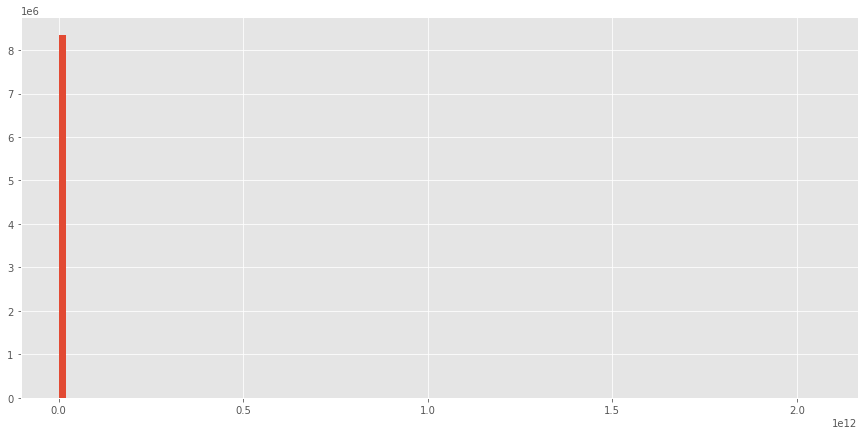

In [7]:
print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

In [8]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

Loading the generated research universe


In [9]:
print("Merging the dataset with research universe\n")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')
print("Counting NaNs for each column.\n", data.isnull().sum())

Merging the dataset with research universe

Counting NaNs for each column.
 data_date      0
security_id    0
d8             0
dtype: int64


<AxesSubplot:title={'center':'Daily d8 #stocks falling into the trading universe'}, xlabel='data_date'>

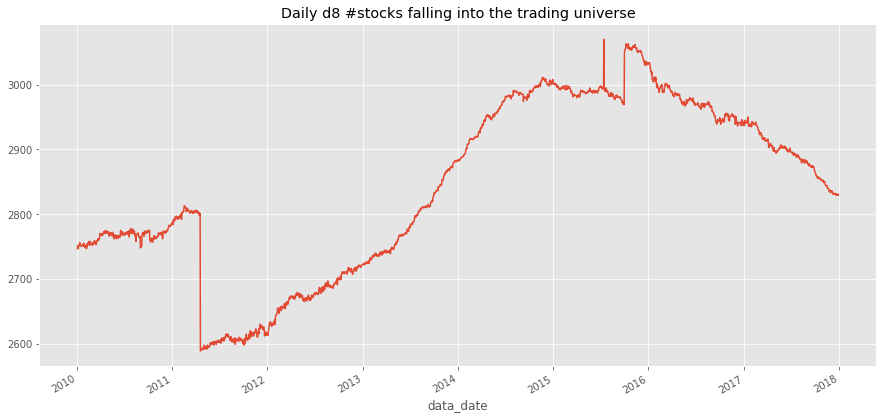

In [10]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [11]:
save_file_path = os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz')
print(f"data is saved to {save_file_path}")
data.to_csv(save_file_path, index=False, compression='gzip')

data is saved to /home/jma/Python3.7/Cubist_2021_11/new_processed_csvs/new_data_8.csv.gz


In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

# d1 has strong seasonal pattern, from Min, Max time series plot
# d11 may be something to do with market cap

def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()

In [ ]:
ds_id = 8
csvfile = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'
dtcol = 'data_date'
seccol = 'security_id'

with zipfile.ZipFile(os.path.join(data_root, 'data_sets.zip')) as zf:
    df = pd.read_csv(zf.open(csvfile), parse_dates=[dtcol], dtype={seccol: str})
    df[scorecol] = pd.to_numeric(df[scorecol], errors='coerce')
    df.sort_values(by=[dtcol, seccol], inplace=True)

In [ ]:
print(df.duplicated(subset=[dtcol, seccol]).sum())
print(df.shape)

In [ ]:
# df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df[scorecol].describe())
print(df.head(), '\n\n')
print(df.tail(), '\n\n')
print(df.shape, '\n\n')
print(df.dtypes, '\n\n')
print(df.isnull().sum(), '\n\n')

In [ ]:
print("Before dropping 0, shape: ", df.shape)
df.groupby(dtcol).size().plot()

In [ ]:
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
df.dropna(subset=[scorecol], inplace=True)
print("After dropping 0, shape: ", df.shape)
df.groupby(dtcol).size().plot()

In [ ]:
df[scorecol].describe()

In [ ]:
rsch_universe = pd.read_csv('/home/jma/Python3.7/Cubist_2021_11/new_processed_csvs/new_rsch_universe.csv.gz', 
                            usecols=['data_date', 'security_id'], 
                            parse_dates=['data_date'], dtype={'security_id': str})

data = df.merge(rsch_universe, on=['data_date', 'security_id'], how='inner')
print(data.head())

In [ ]:
ts_series = data.groupby(dtcol)[scorecol].apply(
    lambda x: pd.Series([x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                         index=['Min', '20%', '40%', '60%', '80%', 'Max']))
ts_series = ts_series.unstack().reset_index()

In [ ]:
yr = '2017'
ts_series.loc[ts_series[dtcol].between(f'{yr}-01-01', f'{yr}-12-30')].set_index(dtcol).plot()

In [ ]:
plot_timeseries_dist(data, scorecol, dtcol=dtcol, plot_min_max=False)

In [ ]:
data.groupby(dtcol).size().plot()

In [ ]:
data[scorecol].describe()

In [ ]:
data.to_csv(os.path.join(data_root, 'new_processed_csvs/new_data_8.csv.gz'), index=False, compression='gzip')

In [ ]:
data.groupby(dtcol).size().plot()

In [ ]:
data.head()